In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
kratdata=pd.read_csv('krat_energy.csv',header=None)
kratdata.columns = ['krat_id', 'cycle','open_pw','bush_pw','energy_score','movements','cell_id','microhabitat','snakes_in_cell','owls_in_cell']
snakedata=pd.read_csv('snake_energy.csv',header=None)
snakedata.columns = ['snake_id', 'cycle','open_pw','bush_pw','energy_score','movements','cell_id','microhabitat','krats_in_cell','owls_in_cell']
#kratdata.head()
snakedata.head()

,snake_id,cycle,open_pw,bush_pw,energy_score,movements,cell_id,microhabitat,krats_in_cell,owls_in_cell
0,2254451426376,0,0.0,1.0,0,0,"(6, 23)",OPEN,0,0
1,2254451426632,0,0.5,0.5,0,0,"(15, 16)",OPEN,0,0
2,2254451426760,0,0.5,0.5,0,0,"(18, 14)",OPEN,0,0
3,2254451426248,0,1.0,0.0,0,0,"(18, 26)",BUSH,0,0
4,2254451426184,0,1.0,0.0,0,0,"(25, 7)",OPEN,0,0


In [13]:
## Krat individual check
idoi = 2125413596488
ktemp = kratdata[kratdata['krat_id']==idoi]
#ktemp.head(50)

In [12]:
## snake individual check
idoi = 2125413594440
stemp = snakedata[snakedata['snake_id']==idoi]
#stemp.head(50)

Text(0.5, 1.0, 'Snake Count')

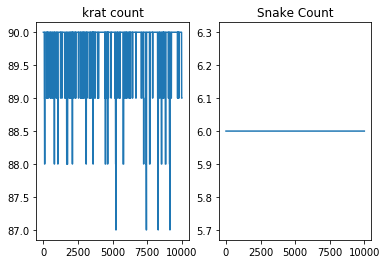

In [56]:
########## Population Counts ###############
df = kratdata[["cycle", "krat_id"]].groupby("cycle").krat_id.nunique()
df = df.reset_index()
df.columns = ['cycle','krats']
df2 = snakedata[["cycle", "snake_id"]].groupby("cycle").snake_id.nunique()
df2 = df2.reset_index()
df2.columns = ['cycle','snakes']


#Now switch to a more OO interface to exercise more features.
fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True)
ax = axs[0]
ax.plot(df['cycle'], df['krats'])
ax.set_title('krat count')

ax = axs[1]
ax.plot(df2['cycle'], df2['snakes'])
ax.set_title('Snake Count')

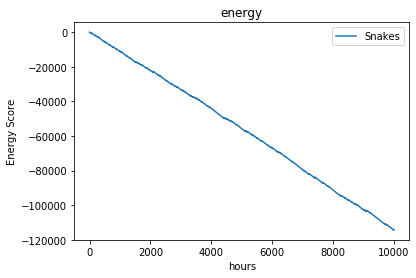

In [57]:
df = kratdata[["cycle", "energy_score"]].groupby("cycle").mean()
df2 = snakedata[["cycle", "energy_score"]].groupby("cycle").mean()
ytemp = list(df.stack())
y = [float(y) for y in ytemp]
ytemp2 = list(df2.stack())
y2 = [float(y2) for y2 in ytemp2]
xtemp= list(df.index)
x = xtemp[0:len(y)]
x2 = xtemp[0:len(y2)]

plt.figure()
#plt.plot(x, y, label = 'Krats')
plt.plot(x2, y2, label = 'Snakes')
#plt.set_xticks(np.arrange(0,len(x),6))
#plt.set_xticklabels(np.arrange(0,len(x),6))

plt.xlabel("hours")
plt.ylabel("Energy Score")
plt.title("energy")
plt.legend()

plt.show()

192


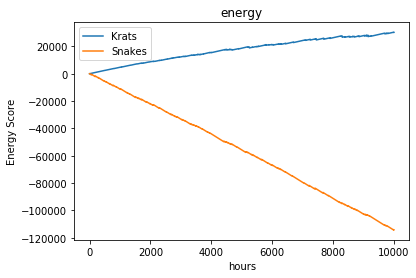

In [58]:
############# krat pop vs snake pop #################
krat_count = len(pd.unique(kratdata['krat_id']))
print(krat_count)
df = kratdata[["cycle", "energy_score"]].groupby("cycle").mean()
df2 = snakedata[["cycle", "energy_score"]].groupby("cycle").mean()
ytemp = list(df.stack())
y = [float(y) for y in ytemp]
ytemp2 = list(df2.stack())
y2 = [float(y2) for y2 in ytemp2]
xtemp= list(df.index)
xtemp2= list(df2.index)
x = xtemp[0:len(y)]
x2 = xtemp2[0:len(y2)]

plt.figure()
plt.plot(x, y, label = 'Krats')
plt.plot(x2, y2, label = 'Snakes')
#plt.set_xticks(np.arrange(0,len(x),6))
#plt.set_xticklabels(np.arrange(0,len(x),6))

plt.xlabel("hours")
plt.ylabel("Energy Score")
plt.title("energy")
plt.legend()

plt.show()

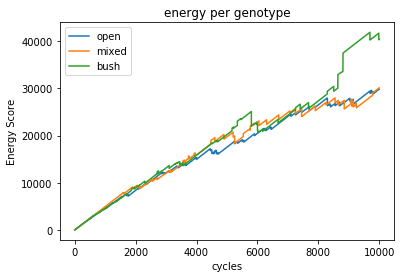

In [59]:
df = kratdata.groupby(["cycle", "bush_pw"]).agg({"energy_score": ['mean']}).reset_index()
df = df.pivot(index="cycle", columns="bush_pw").reset_index()
df.columns = ["cycle","open","mixed","bush"]
plt.figure()
plt.plot(df['cycle'], df['open'], label = 'open')
plt.plot(df['cycle'], df['mixed'], label = 'mixed')
plt.plot(df['cycle'], df['bush'], label = 'bush')
#plt.set_xticks(np.arrange(0,len(x),6))
#plt.set_xticklabels(np.arrange(0,len(x),6))

plt.xlabel("cycles")
plt.ylabel("Energy Score")
plt.title("energy per genotype")
plt.legend()

plt.show()

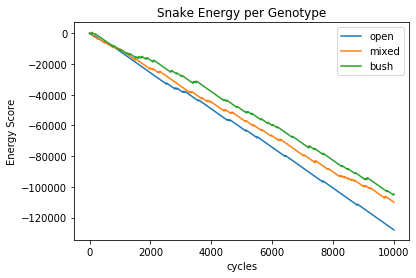

In [60]:
df = snakedata.groupby(["cycle", "bush_pw"]).agg({"energy_score": ['mean']}).reset_index()
df = df.pivot(index="cycle", columns="bush_pw").reset_index()
df.columns = ["cycle","open","mixed","bush"]
plt.figure()
plt.plot(df['cycle'], df['open'], label = 'open')
plt.plot(df['cycle'], df['mixed'], label = 'mixed')
plt.plot(df['cycle'], df['bush'], label = 'bush')
#plt.set_xticks(np.arrange(0,len(x),6))
#plt.set_xticklabels(np.arrange(0,len(x),6))

plt.xlabel("cycles")
plt.ylabel("Energy Score")
plt.title("Snake Energy per Genotype")
plt.legend()

plt.show()

In [2]:
import random as r 
a = ['a','b','c']
weight = [3,1,1]
bleh = r.choices(a,weight,k=15)


TypeError: list indices must be integers or slices, not str

In [6]:
###### Old script for code ref #################


data_initial_time= data['time']== min(data['time'])
data_initial_time = data[data_initial_time]
initial_time = data_initial_time['time'].max()
initial_krat_pop = data_initial_time['krat_pop'].sum()
initial_snake_pop = data_initial_time['snake_pop'].sum()
prompt = 'time: {},  Krats {}, Snakes {}'.format(initial_time,initial_krat_pop,initial_snake_pop)
cells = data['cell_id'].unique()
print('Number Of Cells: {}'.format(len(cells)))
print('Initial Stats')
print(prompt)

data_final_time= data['time']== max(data['time'])
data_final_time = data[data_final_time]
final_time = data_final_time['time'].max()
final_krat_pop = data_final_time['krat_pop'].sum()
final_snake_pop = data_final_time['snake_pop'].sum()
prompt = 'time: {}, Krats {}, Snakes {}'.format(final_time,final_krat_pop,final_snake_pop)
print('Final Stats')
print(prompt)


Number Of Cells: 2500
Initial Stats
time: 0,  Krats 100, Snakes 8
Final Stats
time: 8748, Krats 100, Snakes 8


100.0


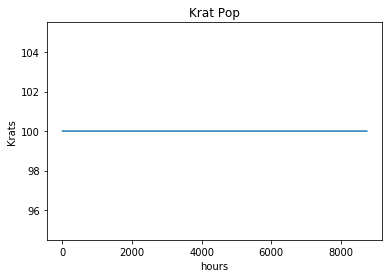

In [7]:
import matplotlib.pyplot as plt
import numpy as np

df = data[["time", "krat_pop"]].groupby("time").sum()
ytemp = list(df.stack())
y = [float(y) for y in ytemp]
xtemp= list(df.index)
x = xtemp[0:len(y)]
print(min(y))

plt.figure()
plt.plot(x, y)
#plt.set_xticks(np.arrange(0,len(x),6))
#plt.set_xticklabels(np.arrange(0,len(x),6))

plt.xlabel("hours")
plt.ylabel("Krats")
plt.title("Krat Pop")

plt.show()

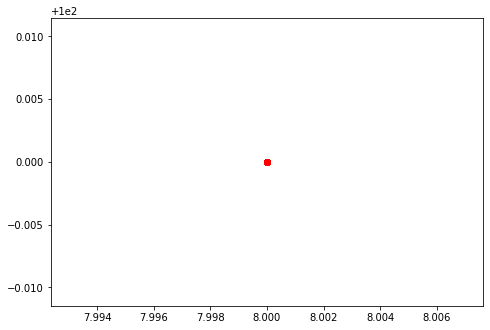

In [8]:
import matplotlib.pyplot as plt
import numpy as np

df = data[["time", "krat_pop","snake_pop"]].groupby("time").sum()
df = df.reset_index()
x = df['snake_pop']
y = df['krat_pop']
#ytemp = list(df.stack())
#y = [float(y) for y in ytemp]
#xtemp= list(df.index)
#x = xtemp[0:len(y)]
#print(min(y))
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(x, y, color='r')

#plt.xlabel("hours")
#plt.ylabel("Krats")
#plt.title("Krat Pop")

plt.show()

Krat
Percent of Time in Bush
0.5266392694063927


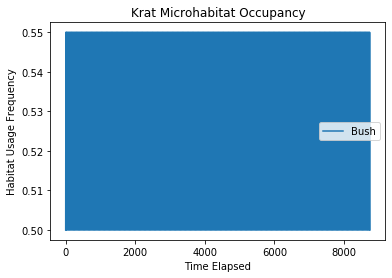

In [9]:
df = data.groupby(["time","habitat_type"]).agg({'krat_pop': ['sum']}).reset_index()
df.columns = ['time','habitat_type','krat_pop']
df = df.pivot(index='time', columns='habitat_type', values='krat_pop').reset_index()
print('Krat')
print('Percent of Time in Bush')
print(df['BUSH'].sum()/(df['BUSH'].sum()+df['OPEN'].sum()))
df['BUSH_OCC'] = df['BUSH']/(df['BUSH']+df['OPEN'])
df['OPEN_OCC'] = df['OPEN']/(df['BUSH']+df['OPEN'])
df= df[['time','BUSH_OCC','OPEN_OCC']]
# line 1 points

# plotting the line 1 points 
plt.plot(df['time'], df['BUSH_OCC'], label = "Bush")
# line 2 points

#plt.plot(df['time'], df['OPEN_OCC'], label = "Open")
plt.xlabel('Time Elapsed')
# Set the y axis label of the current axis.
plt.ylabel('Habitat Usage Frequency')
# Set a title of the current axes.
plt.title('Krat Microhabitat Occupancy')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()
#add moc if no kangaroo rats in the cell

Snake
Proportion of Time in Bush
0.015525114155251141


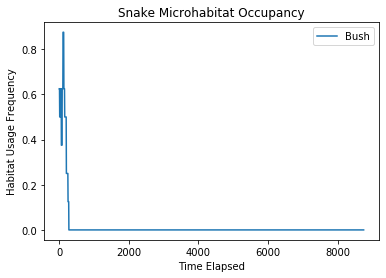

In [11]:
df = data.groupby(["time","habitat_type"]).agg({'snake_pop': ['sum']}).reset_index()
df.columns = ['time','habitat_type','snake_pop']
df = df.pivot(index='time', columns='habitat_type', values='snake_pop').reset_index()
print('Snake')
print('Proportion of Time in Bush')
print(df['BUSH'].sum()/(df['BUSH'].sum()+df['OPEN'].sum()))
df['BUSH_OCC'] = df['BUSH']/(df['BUSH']+df['OPEN'])
df['OPEN_OCC'] = df['OPEN']/(df['BUSH']+df['OPEN'])
df= df[['time','BUSH_OCC','OPEN_OCC']]
# line 1 points

# plotting the line 1 points 
plt.plot(df['time'], df['BUSH_OCC'], label = "Bush")
# line 2 points

#plt.plot(df['time'], df['OPEN_OCC'], label = "Open")
plt.xlabel('Time Elapsed')
# Set the y axis label of the current axis.
plt.ylabel('Habitat Usage Frequency')
# Set a title of the current axes.
plt.title('Snake Microhabitat Occupancy')
# show a legend on the plot
plt.legend()
# Display a figure.

plt.show()

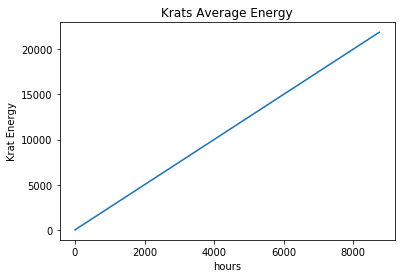

In [12]:
df = pd.DataFrame(data[["time","krat_pop", "krat_energy"]].groupby("time").sum())
df.reset_index(inplace=True)
df['average_krat_energy'] = df['krat_energy']/df['krat_pop']
ytemp = list(df['average_krat_energy'])
#if y>0
y = [y for y in ytemp]
x= list(df['time'])


plt.figure()
plt.plot(x, y)
#plt.set_xticks(np.arrange(0,len(x),6))
#plt.set_xticklabels(np.arrange(0,len(x),6))

plt.xlabel("hours")
plt.ylabel("Krat Energy")
plt.title("Krats Average Energy")

plt.show()

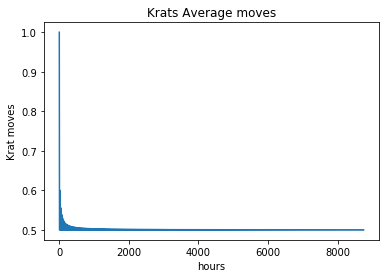

In [13]:
df = pd.DataFrame(data[["time","krat_pop", "krat_movement"]].groupby("time").sum())
df.reset_index(inplace=True)
df['average_krat_movment'] = (df['krat_movement']/df['krat_pop'])/df['time']
ytemp = list(df['average_krat_movment'])
#if y>0
y = [y for y in ytemp]
x= list(df['time'])


plt.figure()
plt.plot(x, y)
#plt.set_xticks(np.arrange(0,len(x),6))
#plt.set_xticklabels(np.arrange(0,len(x),6))

plt.xlabel("hours")
plt.ylabel("Krat moves")
plt.title("Krats Average moves")

plt.show()

8.0


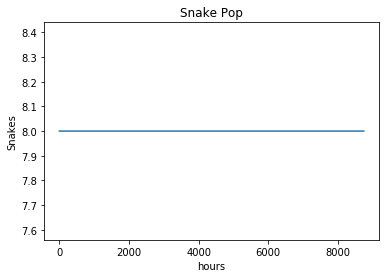

In [14]:
import matplotlib.pyplot as plt
import numpy as np

df = data[["time", "snake_pop"]].groupby("time").sum()
ytemp = list(df.stack())
y = [float(y) for y in ytemp]
xtemp= list(df.index)
#xtemp = list(df['time_of_day'])
x = xtemp[0:len(y)]
print(min(y))


plt.figure()
plt.plot(x, y)
#plt.set_xticks(np.arrange(0,len(x),6))
#plt.set_xticklabels(np.arrange(0,len(x),6))

plt.xlabel("hours")
plt.ylabel("Snakes")
plt.title("Snake Pop")

plt.show()

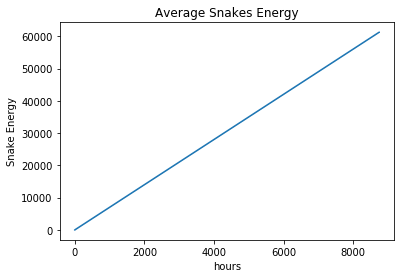

In [15]:
df = pd.DataFrame(data[["time","snake_pop", "snake_energy"]].groupby("time").sum())
df.reset_index(inplace=True)
df['average_snake_energy'] = df['snake_energy']/df['snake_pop']
ytemp = list(df['average_snake_energy'])
y = [y for y in ytemp]
x= list(df['time'])


plt.figure()
plt.plot(x, y)
#plt.set_xticks(np.arrange(0,len(x),6))
#plt.set_xticklabels(np.arrange(0,len(x),6))

plt.xlabel("hours")
plt.ylabel("Snake Energy")
plt.title("Average Snakes Energy")

plt.show()

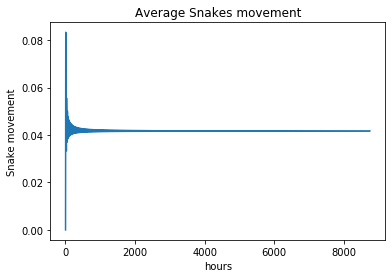

In [16]:
df = pd.DataFrame(data[["time","snake_pop", "snake_movement"]].groupby("time").sum())
df.reset_index(inplace=True)
df['average_snake_movement'] = (df['snake_movement']/df['snake_pop'])/df['time']
ytemp = list(df['average_snake_movement'])
y = [y for y in ytemp]
x= list(df['time'])


plt.figure()
plt.plot(x, y)
#plt.set_xticks(np.arrange(0,len(x),6))
#plt.set_xticklabels(np.arrange(0,len(x),6))

plt.xlabel("hours")
plt.ylabel("Snake movement")
plt.title("Average Snakes movement")

plt.show()

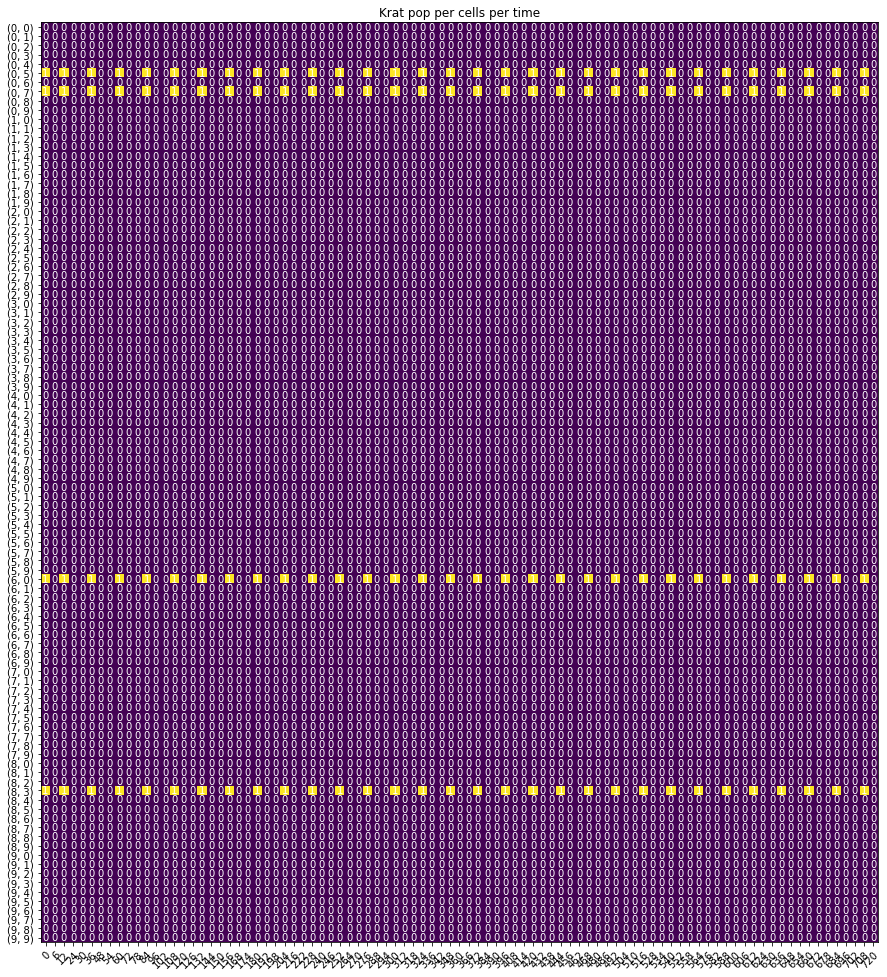

In [17]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# sphinx_gallery_thumbnail_number = 2

df = data[['time','cell_id','krat_pop']]

def cell_id_analysis(width,length):
    cell_ids = []
    for x in range(width+1):
        for y in range(length+1):
            cell_id = (x,y)
            cell_ids.append(cell_id)
    return cell_ids

cell_ids =  cell_id_analysis(9,9)
cell_ids = [str(cell_id) for cell_id in cell_ids]
df =df[df['time'] <= 720]
df =df[df.cell_id.isin(cell_ids)]
newdf = df.pivot(index='cell_id', columns='time', values='krat_pop')
time = df['time'].unique()
info = np.array(newdf)
newdf.reset_index(inplace=True)
m = pd.DataFrame(newdf)
cells = m['cell_id'].unique()

fig, ax = plt.subplots(figsize=(15,30))
im = ax.imshow(info)

# We want to show all ticks...
ax.set_xticks(np.arange(len(time)))
ax.set_yticks(np.arange(len(cells)))
# ... and label them with the respective list entries
ax.set_xticklabels(time)
ax.set_yticklabels(cells)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(cells)):
    for j in range(len(time)):
        text = ax.text(j, i, int(info[i, j]),
                       ha="center", va="center", color="w")

ax.set_title("Krat pop per cells per time")
#fig.tight_layout()
plt.show()

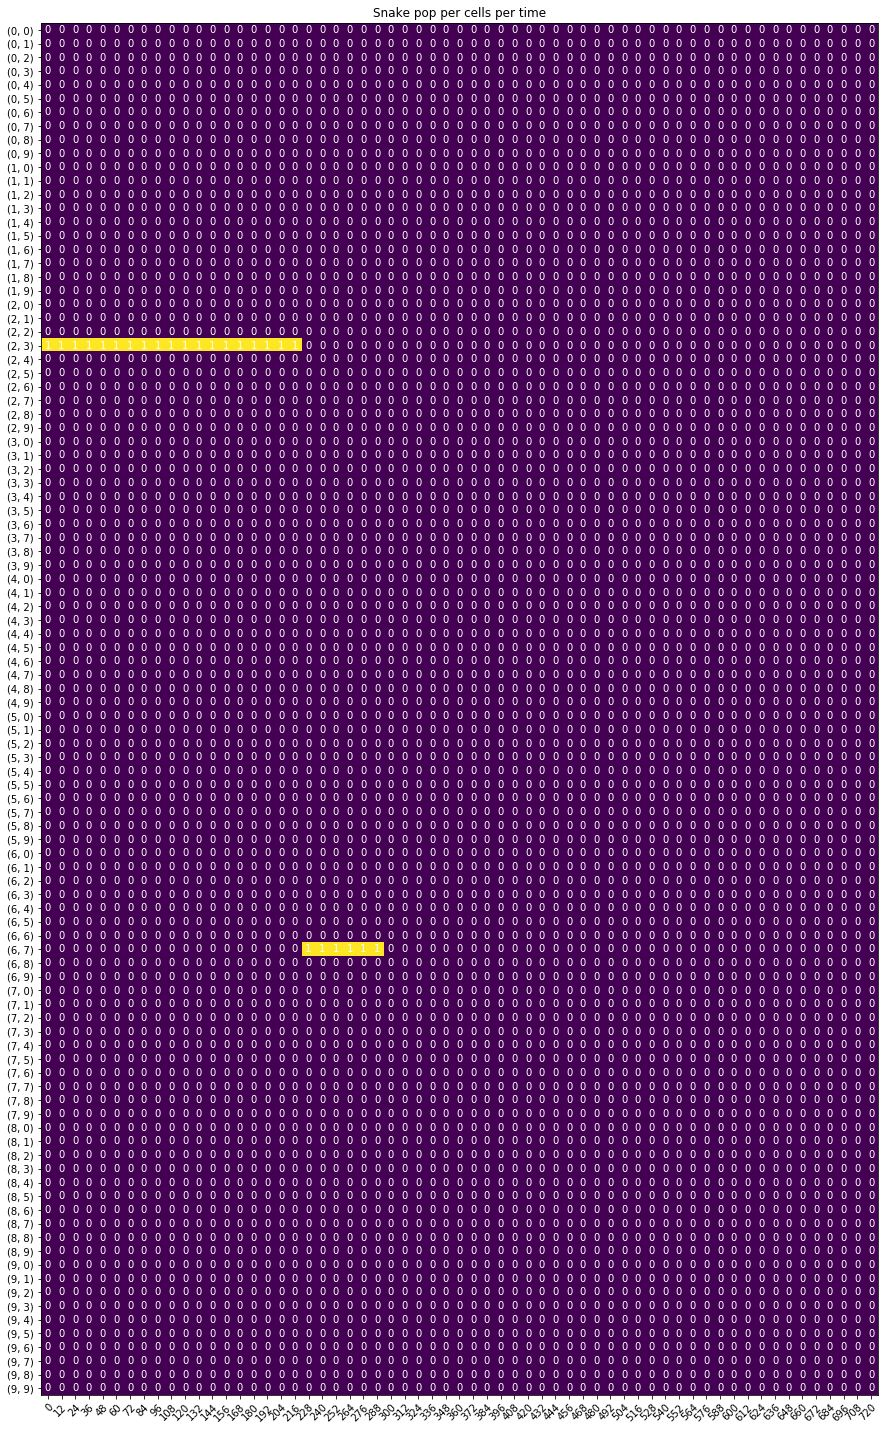

In [13]:

df = data[['time','cell_id','snake_pop']]
cell_ids =  cell_id_analysis(9,9)
cell_ids = [str(cell_id) for cell_id in cell_ids]
df =df[df['time'] <= 720]
df =df[df.cell_id.isin(cell_ids)]
newdf = df.pivot(index='cell_id', columns='time', values='snake_pop').fillna(0)
time = df['time'].unique()
info = np.array(newdf)
newdf.reset_index(inplace=True)
m = pd.DataFrame(newdf)
cells = m['cell_id'].unique()

fig, ax = plt.subplots(figsize=(15,30))
im = ax.imshow(info)

# We want to show all ticks...
ax.set_xticks(np.arange(len(time)))
ax.set_yticks(np.arange(len(cells)))
# ... and label them with the respective list entries
ax.set_xticklabels(time)
ax.set_yticklabels(cells)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(cells)):
    for j in range(len(time)):
        text = ax.text(j, i, int(info[i, j]),
                       ha="center", va="center", color="w")

ax.set_title("Snake pop per cells per time")
#fig.tight_layout()
plt.show()

In [2]:
import math
def probability_time_step_adjustment(probability_success,time_step,number_of_successes):
    p = probability_success
    q = 1-probability_success
    cn = math.factorial(int(time_step))/(math.factorial(int(time_step - number_of_successes))*math.factorial(int(number_of_successes)))
    prob = cn*p**(number_of_successes)*q**(time_step - number_of_successes)
    return prob


prob_of_success = (7/32)
time_step = 6
for i in range(time_step):
    new_prob =  probability_time_step_adjustment(probability_success = prob_of_success ,time_step = time_step,number_of_successes = i)
    print('i: {}, new prob: {}'.format(i,new_prob))

i: 0, new prob: 0.22737367544323206
i: 1, new prob: 0.38198777474462986
i: 2, new prob: 0.2673914423212409
i: 3, new prob: 0.0998261384665966
i: 4, new prob: 0.020963489077985287
i: 5, new prob: 0.002347910776734352
